# Students' dropout and Academic Success

### Project developed by:
- Pedro Jesus (up201907523)
- Sofia Germer (up201907461)
- Sérgio Estêvão (up201905680)

## Table of Contents

1. [Specification](#Specification)
2. [Related Work](#Related-work)
3. [Approach](#Approach)
4. [Required Libraries](#Required-libraries)
5. [Data Analysis](#Data-analysis)
6. [Data Preprocessing](#Data-Processing)
7. Classification

## Specification

Our approach to this problem was as follows:

1. **Data analysis:** 
2. **Algorithm implementation:**
3. **Evalutation and refinement:**

## Required Libraries

- numpy
- pandas
- matplotlib
- sklearn
- seaborn

These libraries can be installed by running the following command in the terminal:
> ``` pip install -r requirements.txt ```

## Data analysis

We start by importing the required libraries and plotting some graphs for initial analysis of the dataset.

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpt
import sklearn as sk
import seaborn as sb
import warnings

warnings.filterwarnings("ignore")


dataset = pd.read_csv('data.csv', na_values=['NA'], delimiter=";")

dataset.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


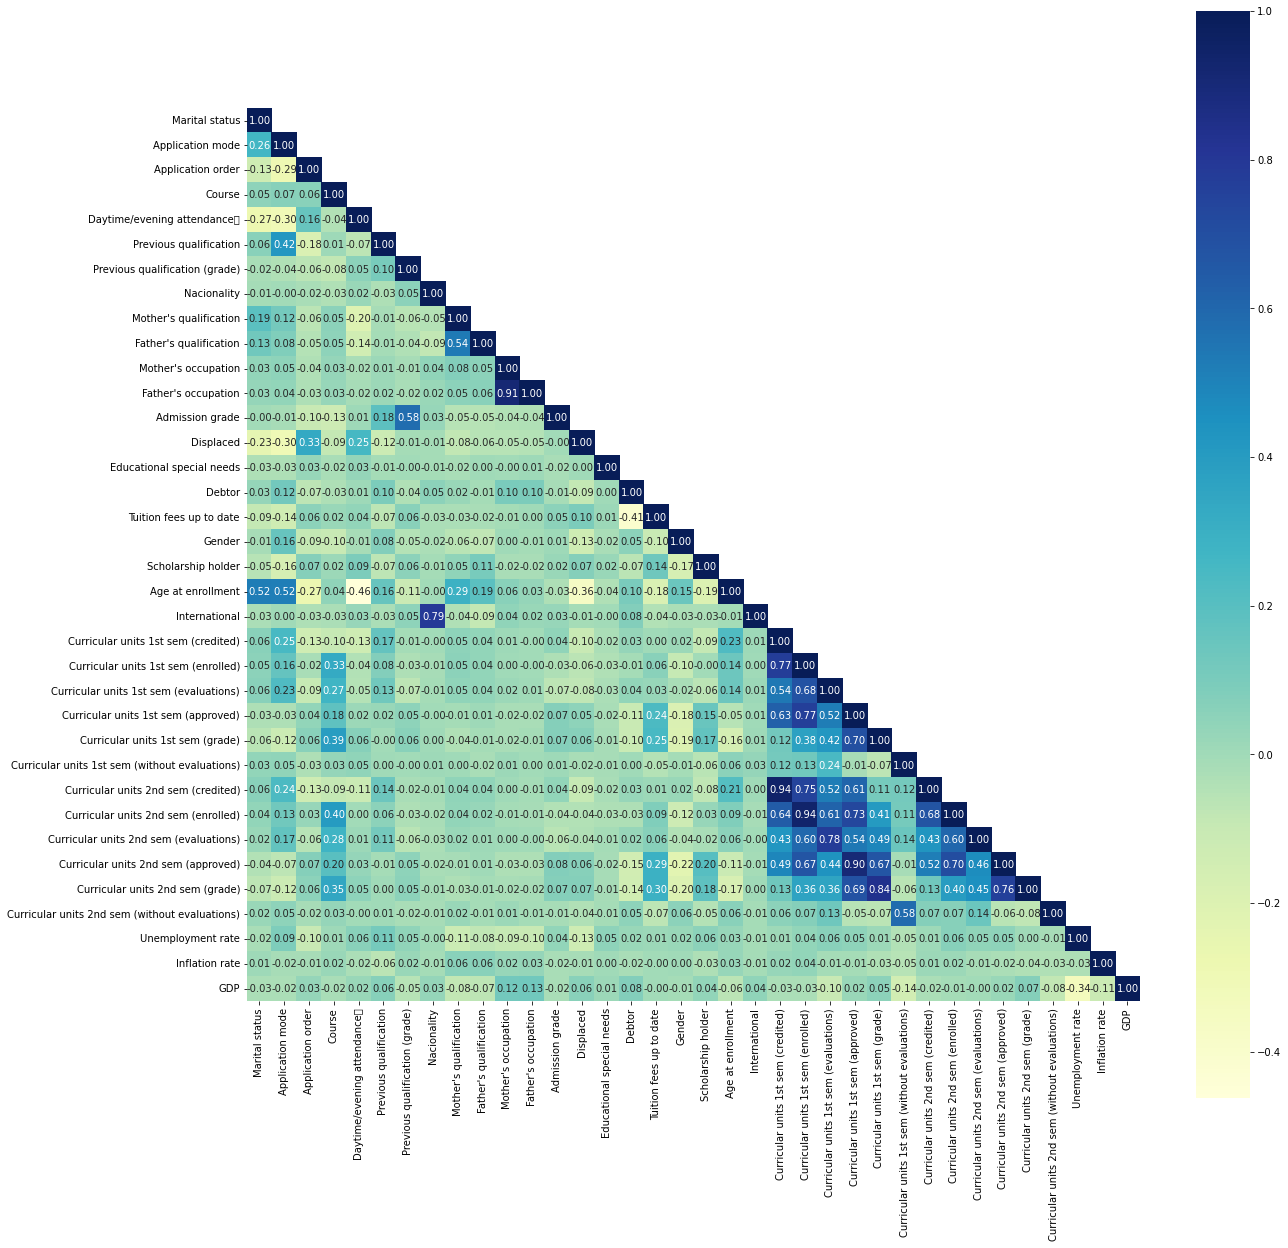

In [38]:
dataset_corr = dataset.corr()
plt.figure(figsize=(20,20))
mask = np.zeros_like(dataset_corr)
mask[np.triu_indices_from(mask, k=1)] = True
sb.heatmap(dataset_corr, cmap="YlGnBu", annot=True, square=True, mask=mask, fmt='.2f', annot_kws={"size": 10});
plt.show()

### All Data Histogram

array([[<AxesSubplot:title={'center':'Marital status'}>,
        <AxesSubplot:title={'center':'Application mode'}>,
        <AxesSubplot:title={'center':'Application order'}>,
        <AxesSubplot:title={'center':'Course'}>,
        <AxesSubplot:title={'center':'Daytime/evening attendance\t'}>,
        <AxesSubplot:title={'center':'Previous qualification'}>],
       [<AxesSubplot:title={'center':'Previous qualification (grade)'}>,
        <AxesSubplot:title={'center':'Nacionality'}>,
        <AxesSubplot:title={'center':"Mother's qualification"}>,
        <AxesSubplot:title={'center':"Father's qualification"}>,
        <AxesSubplot:title={'center':"Mother's occupation"}>,
        <AxesSubplot:title={'center':"Father's occupation"}>],
       [<AxesSubplot:title={'center':'Admission grade'}>,
        <AxesSubplot:title={'center':'Displaced'}>,
        <AxesSubplot:title={'center':'Educational special needs'}>,
        <AxesSubplot:title={'center':'Debtor'}>,
        <AxesSubplot:title={'

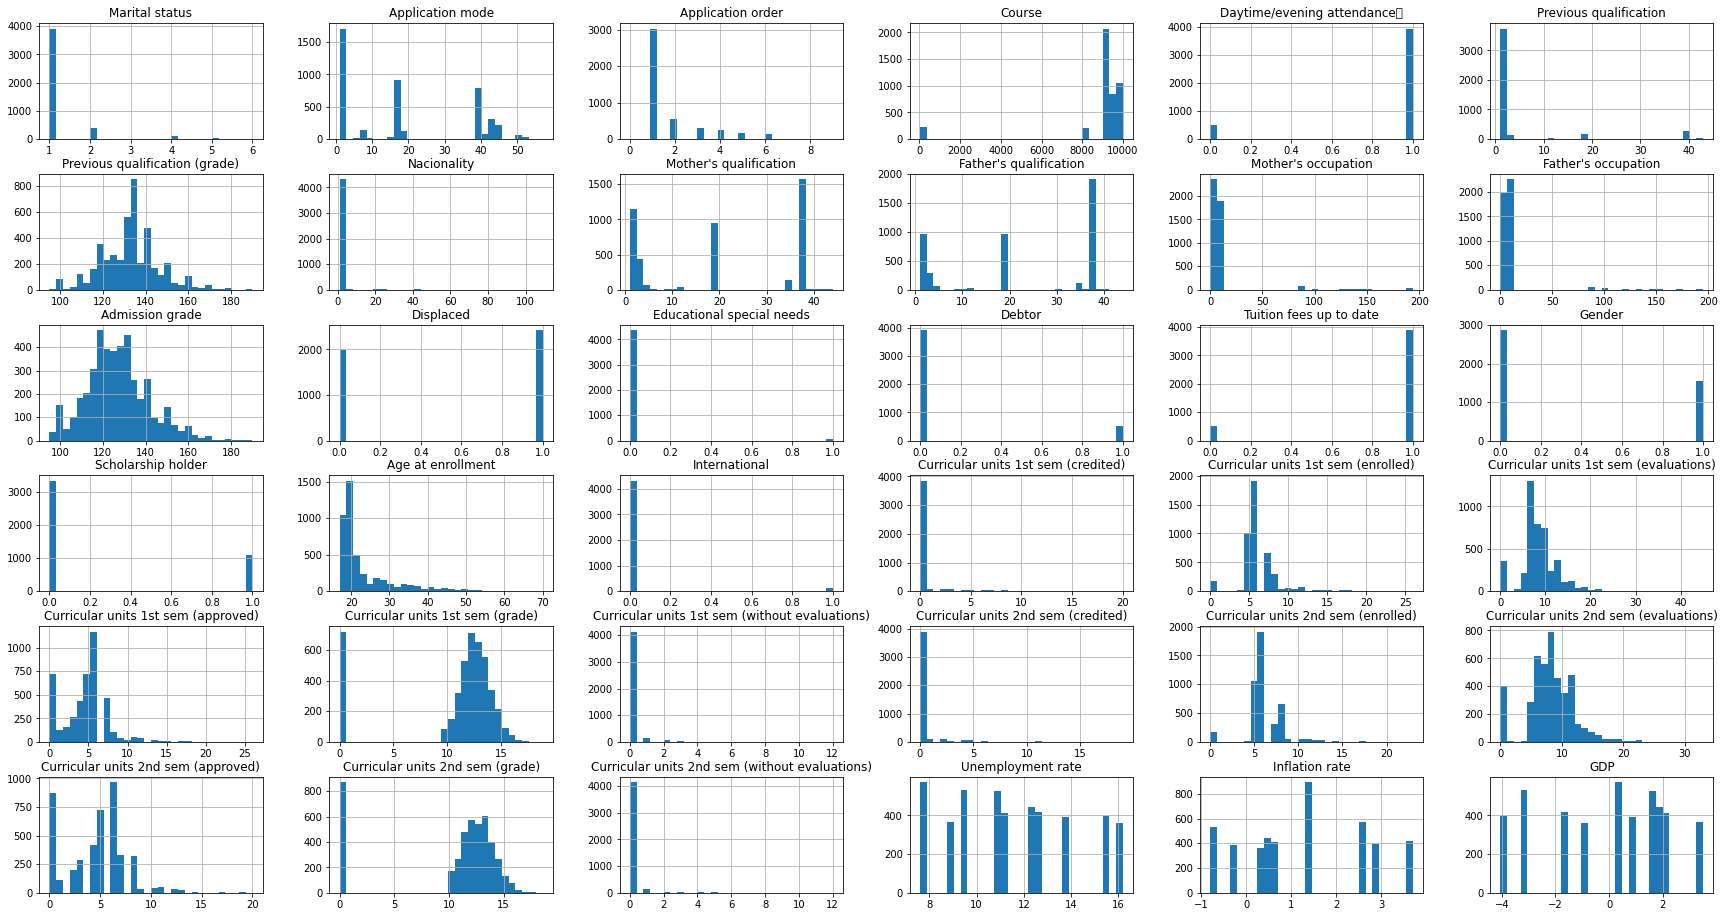

In [39]:
dataset.hist(bins=30, figsize=(30, 16), sharey=False)

### Dropout Data Histogram

array([[<AxesSubplot:title={'center':'Marital status'}>,
        <AxesSubplot:title={'center':'Application mode'}>,
        <AxesSubplot:title={'center':'Application order'}>,
        <AxesSubplot:title={'center':'Course'}>,
        <AxesSubplot:title={'center':'Daytime/evening attendance\t'}>,
        <AxesSubplot:title={'center':'Previous qualification'}>],
       [<AxesSubplot:title={'center':'Previous qualification (grade)'}>,
        <AxesSubplot:title={'center':'Nacionality'}>,
        <AxesSubplot:title={'center':"Mother's qualification"}>,
        <AxesSubplot:title={'center':"Father's qualification"}>,
        <AxesSubplot:title={'center':"Mother's occupation"}>,
        <AxesSubplot:title={'center':"Father's occupation"}>],
       [<AxesSubplot:title={'center':'Admission grade'}>,
        <AxesSubplot:title={'center':'Displaced'}>,
        <AxesSubplot:title={'center':'Educational special needs'}>,
        <AxesSubplot:title={'center':'Debtor'}>,
        <AxesSubplot:title={'

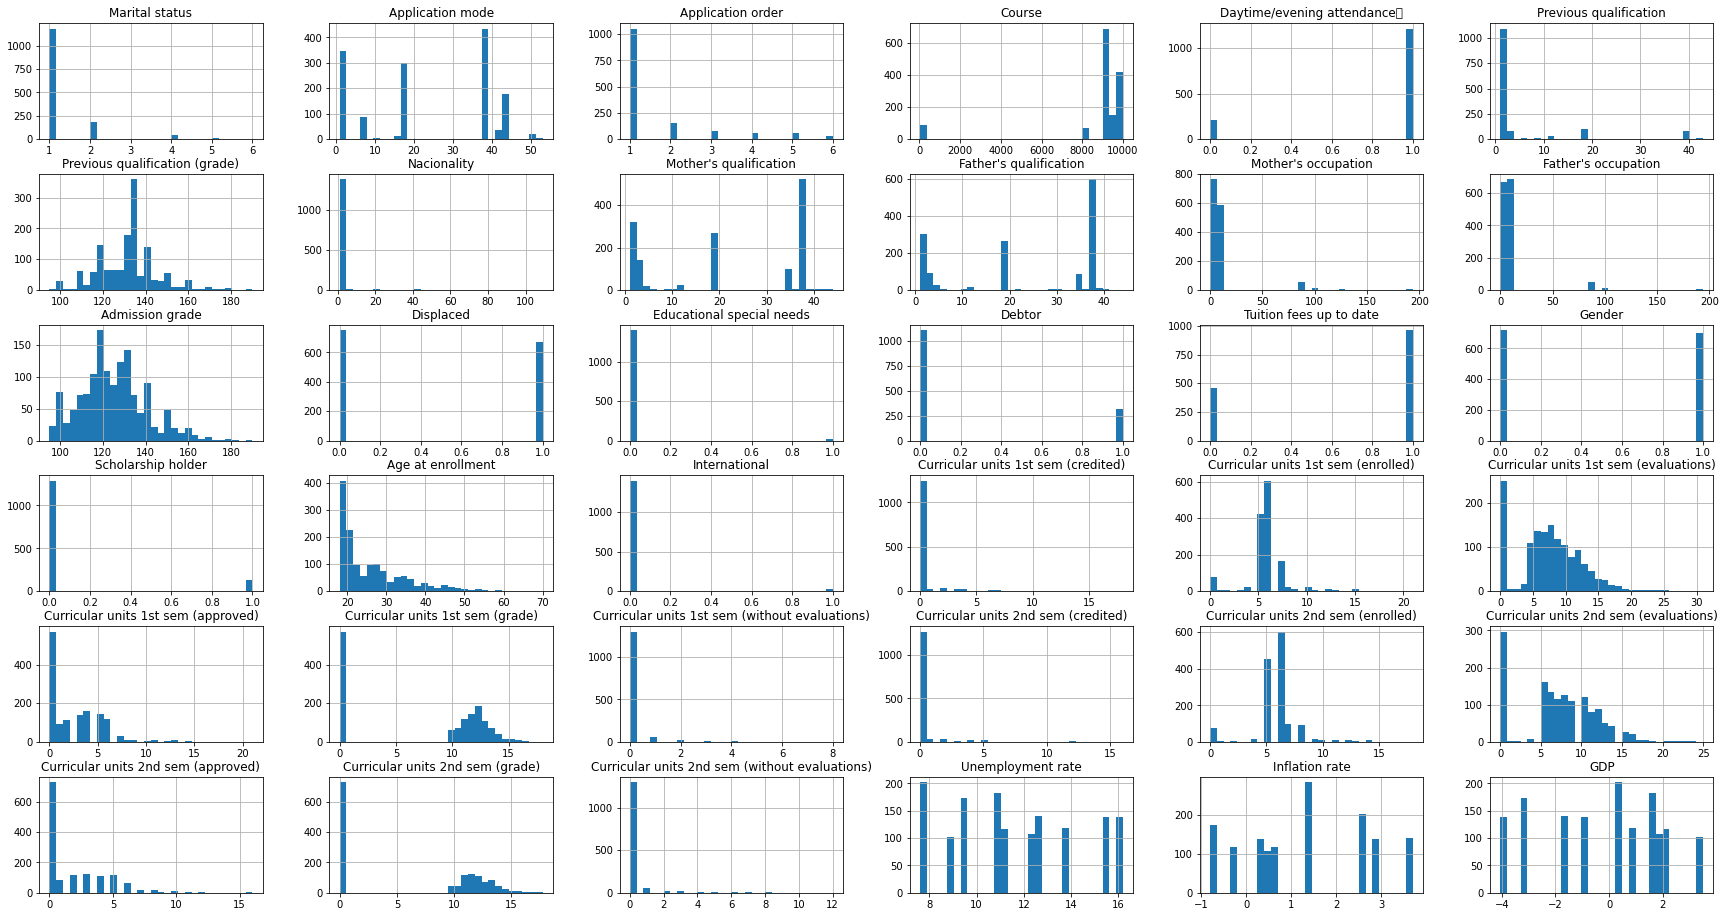

In [36]:
dropout_data = dataset.loc[dataset["Target"] == "Dropout"]
dropout_data.hist(bins=30, figsize=(30, 16), sharey=False)

### Graduate Data Histogram

array([[<AxesSubplot:title={'center':'Marital status'}>,
        <AxesSubplot:title={'center':'Application mode'}>,
        <AxesSubplot:title={'center':'Application order'}>,
        <AxesSubplot:title={'center':'Course'}>,
        <AxesSubplot:title={'center':'Daytime/evening attendance\t'}>,
        <AxesSubplot:title={'center':'Previous qualification'}>],
       [<AxesSubplot:title={'center':'Previous qualification (grade)'}>,
        <AxesSubplot:title={'center':'Nacionality'}>,
        <AxesSubplot:title={'center':"Mother's qualification"}>,
        <AxesSubplot:title={'center':"Father's qualification"}>,
        <AxesSubplot:title={'center':"Mother's occupation"}>,
        <AxesSubplot:title={'center':"Father's occupation"}>],
       [<AxesSubplot:title={'center':'Admission grade'}>,
        <AxesSubplot:title={'center':'Displaced'}>,
        <AxesSubplot:title={'center':'Educational special needs'}>,
        <AxesSubplot:title={'center':'Debtor'}>,
        <AxesSubplot:title={'

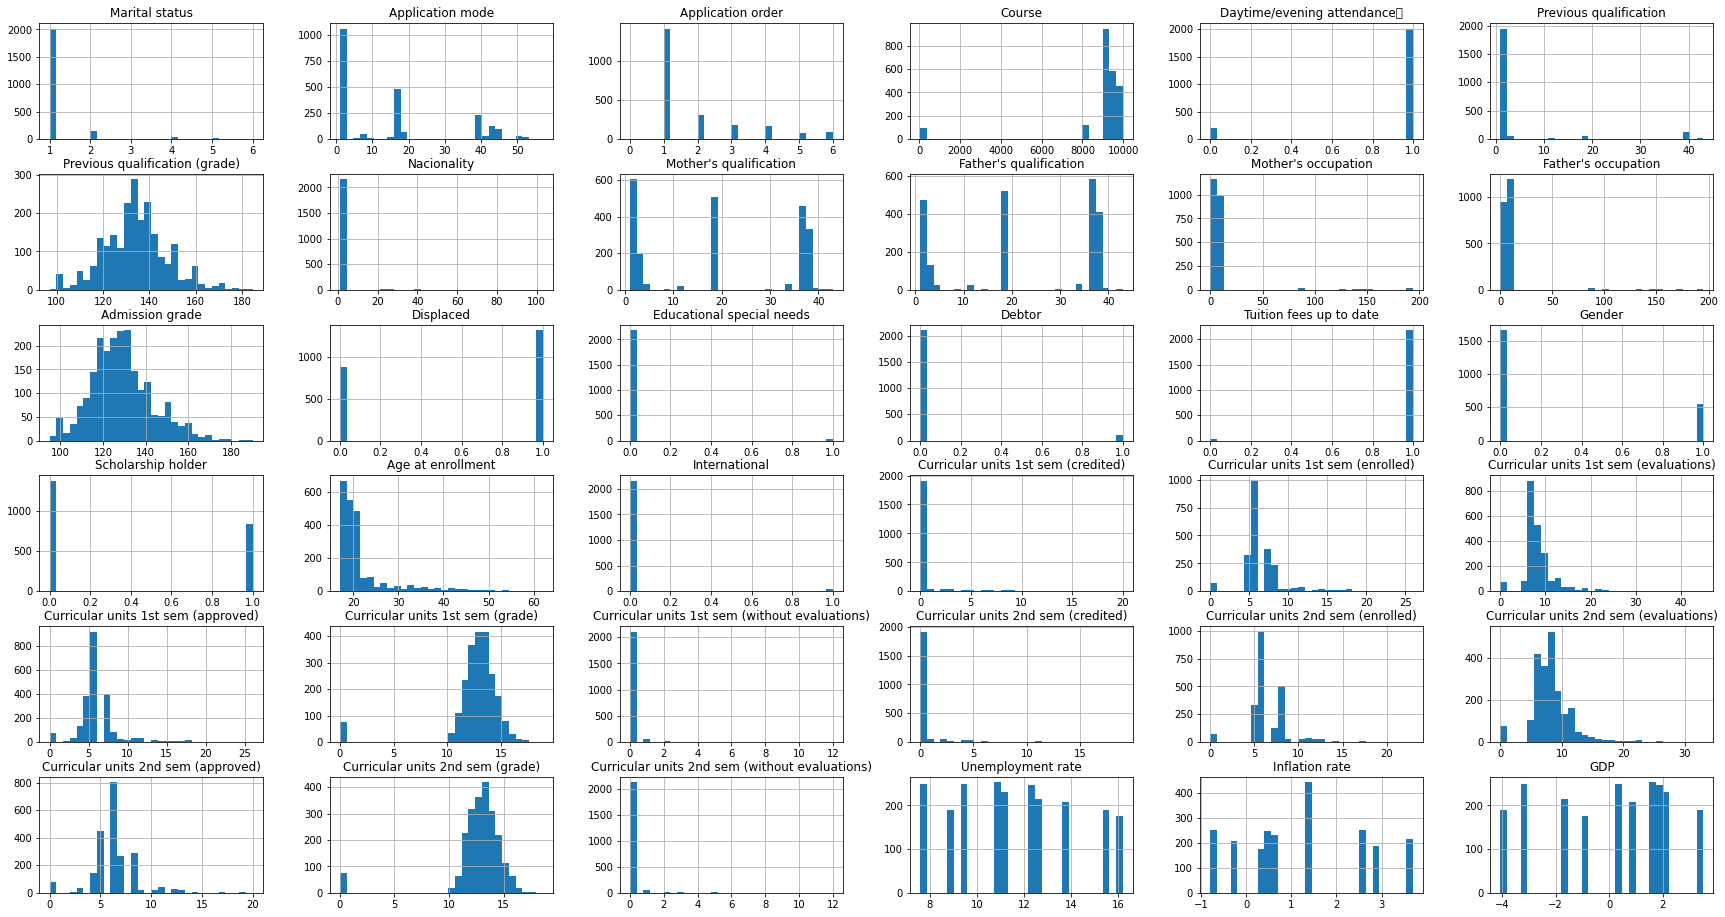

In [40]:
graduate_data = dataset.loc[dataset["Target"] == "Graduate"]
graduate_data.hist(bins=30, figsize=(30, 16), sharey=False)

### Enrolled Data Histogram

array([[<AxesSubplot:title={'center':'Marital status'}>,
        <AxesSubplot:title={'center':'Application mode'}>,
        <AxesSubplot:title={'center':'Application order'}>,
        <AxesSubplot:title={'center':'Course'}>,
        <AxesSubplot:title={'center':'Daytime/evening attendance\t'}>,
        <AxesSubplot:title={'center':'Previous qualification'}>],
       [<AxesSubplot:title={'center':'Previous qualification (grade)'}>,
        <AxesSubplot:title={'center':'Nacionality'}>,
        <AxesSubplot:title={'center':"Mother's qualification"}>,
        <AxesSubplot:title={'center':"Father's qualification"}>,
        <AxesSubplot:title={'center':"Mother's occupation"}>,
        <AxesSubplot:title={'center':"Father's occupation"}>],
       [<AxesSubplot:title={'center':'Admission grade'}>,
        <AxesSubplot:title={'center':'Displaced'}>,
        <AxesSubplot:title={'center':'Educational special needs'}>,
        <AxesSubplot:title={'center':'Debtor'}>,
        <AxesSubplot:title={'

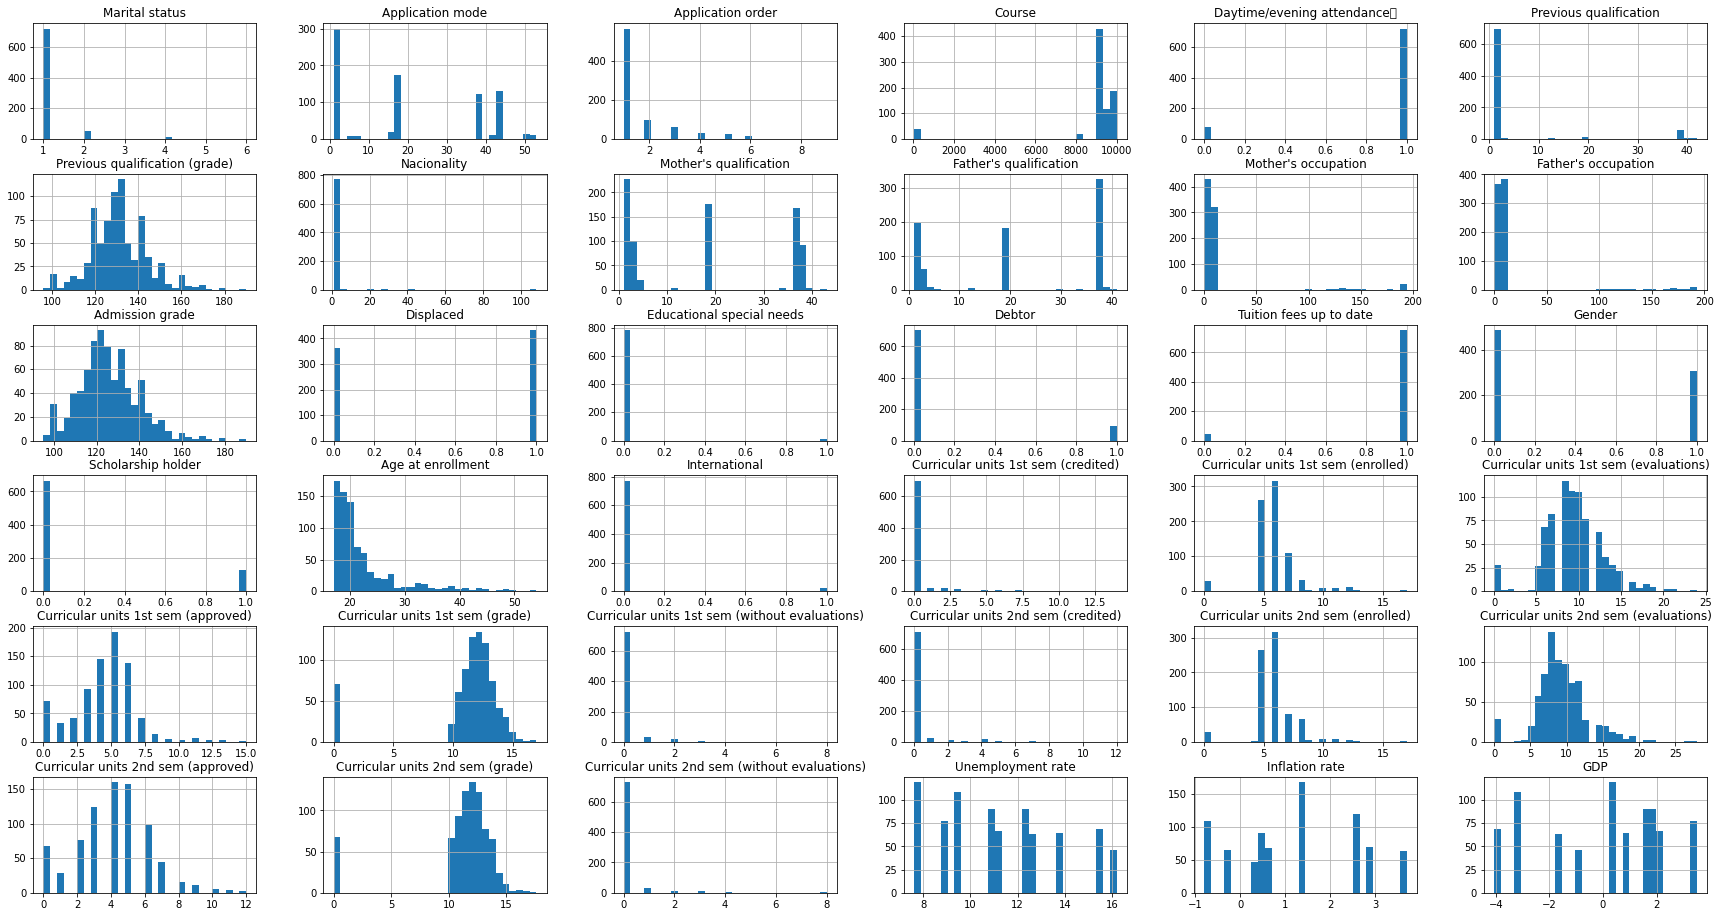

In [41]:
enrolled_data = dataset.loc[dataset["Target"] == "Enrolled"]
enrolled_data.hist(bins=30, figsize=(30, 16), sharey=False)

## Data Preprocessing

We checked the informations about the dataset and verified its consistency. After analysing the results we confirmed that there we no null values and no significant outliers, as seen in the results below, so a significant data preprocessing wasn't needed.

In [42]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance	                     4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

In [44]:
dataset.describe()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,...,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,...,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,57.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


In [45]:
dataset.isnull().sum()

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance\t                      0
Previous qualification                            0
Previous qualification (grade)                    0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrol

Here we split the data into input and label sets for the SciKit classifiers.

In [46]:
dataset['Target'] = dataset['Target'].astype('category')

col_names = list(dataset.columns)
col_names.remove('Target')

inputs = dataset[col_names].values
labels = dataset['Target'].values

We decided to analyse the destribution of results and verifies a resonable class destribution.

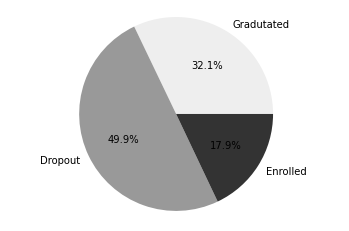

In [55]:
from collections import Counter

distribution_data = list(Counter(labels).values())

fig1, ax1 = plt.subplots()
colors = ( "#EEEEEE","#999999", "#333333") 
ax1.pie(distribution_data, colors = colors,labels=['Gradutated', 'Dropout', 'Enrolled'],autopct='%1.1f%%',)
ax1.axis('equal')  
plt.show()